<a href="https://colab.research.google.com/github/MarjeteV/data602/blob/main/MV_602_final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**How do lifestyle, demographics, and health indicators affect the frequency of seniors' visits to doctors, and which machine learning model provides the most accurate prediction of this visit frequency?**

---




In [3]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from scipy.stats import shapiro




In [4]:
#load data
url='https://raw.githubusercontent.com/MarjeteV/data602/main/NPHA-doctor-visits.csv'
df=pd.read_csv(url)
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [5]:
#summary statistics
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


 The patient's age group = { 1: 50-64 2: 65-80 }.
 There are no '1' values for age; it is possible that only participants age 65-80 are in this subset.

In [6]:
#Changing -1 values in the dataset for Zero
df.replace(-1, 0, inplace=True)
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.795518,2.002801,3.015406,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.410364,2.833333,1.425770,1.55042
std,0.683441,0.0,0.895795,0.901918,1.346561,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.658064,0.520501,1.003896,0.49780
min,1.000000,2.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


Some of the variables have -1 as minimum value that is the code for 'refused'


In [7]:
#checking for missing data - none missing
df.isnull().sum()


Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

In [8]:
#confirming data types
df.dtypes

Number of Doctors Visited                     int64
Age                                           int64
Phyiscal Health                               int64
Mental Health                                 int64
Dental Health                                 int64
Employment                                    int64
Stress Keeps Patient from Sleeping            int64
Medication Keeps Patient from Sleeping        int64
Pain Keeps Patient from Sleeping              int64
Bathroom Needs Keeps Patient from Sleeping    int64
Uknown Keeps Patient from Sleeping            int64
Trouble Sleeping                              int64
Prescription Sleep Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object

In [9]:
# Rename the column
df.rename(columns={'Phyiscal Health': 'Physical Health'}, inplace=True)


In [10]:
race_counts = df['Race'].value_counts()

total_instances = len(df)

race_proportions = race_counts / total_instances

print("Proportion of Each Race:")
print(race_proportions)

Proportion of Each Race:
Race
1    0.809524
2    0.072829
4    0.061625
5    0.028011
3    0.028011
Name: count, dtype: float64


~81% of this sample is white and might not be representive of the population.
Race	The patient's racial or ethnic background = { -2: Not asked -1: REFUSED 1: White, Non-Hispanic 2: Black, Non-Hispanic 3: Other, Non-Hispanic 4: Hispanic 5: 2+ Races, Non-Hispanic } *Note to look into census data to confirm actual pop race for this age group*

In [11]:
frequency_table = df['Number of Doctors Visited'].value_counts()

proportions = frequency_table / len(df)

print(proportions)

Number of Doctors Visited
2    0.521008
3    0.295518
1    0.183473
Name: count, dtype: float64


Total count of different doctors the patient has seen = { 1: 0-1 doctors 2: 2-3 doctors 3: 4 or more doctors }.

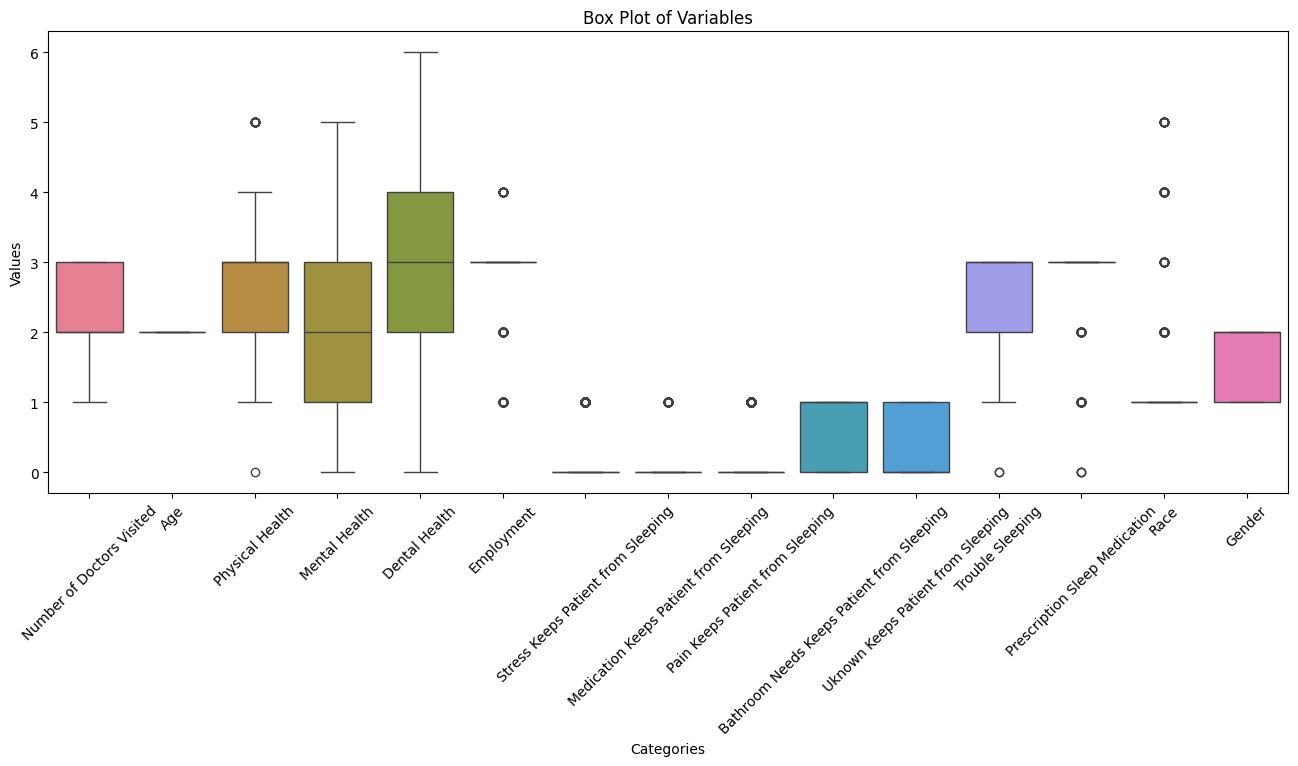

In [12]:
#visualizing with box plots - looking for outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)
# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

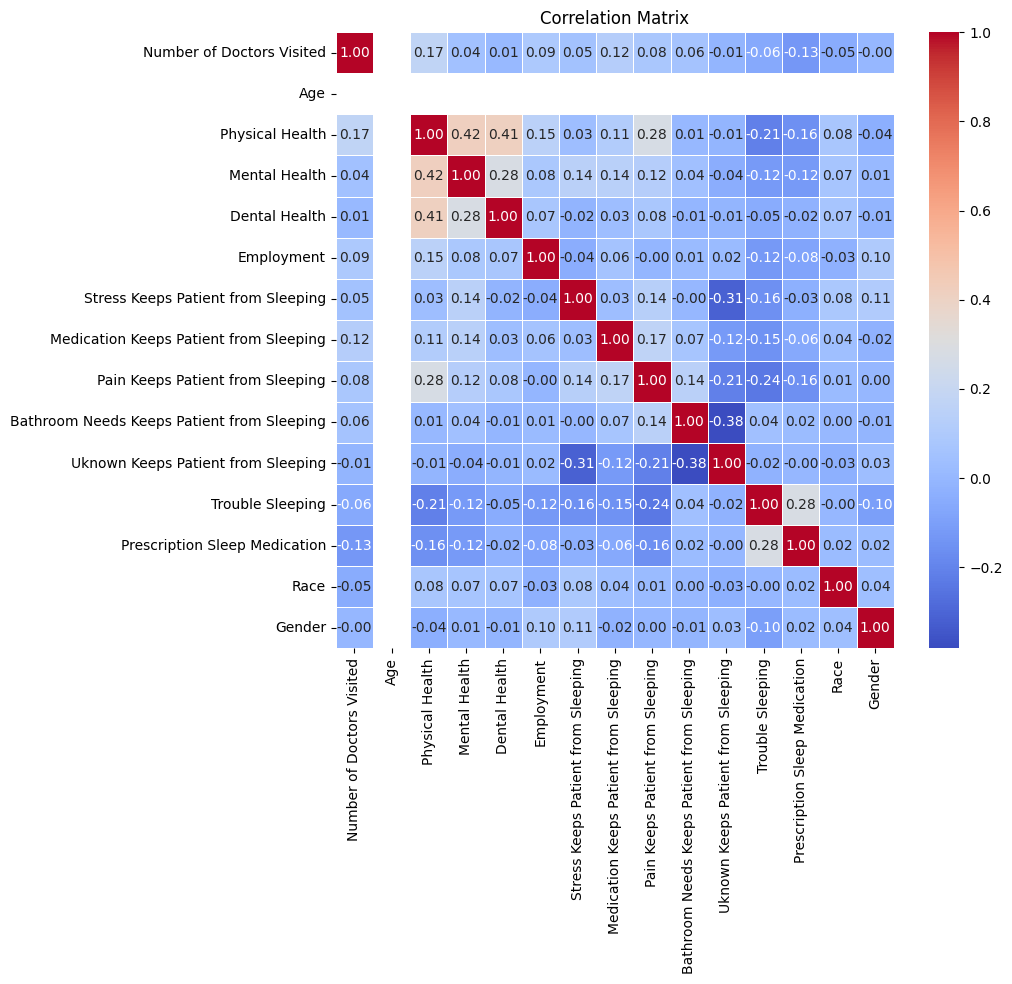

In [13]:
#curious if there is a strong correlation between any variables and number of doctors; no multicollinearity
correlation_matrix = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Create a contingency table for 'Number of Doctors Visited' vs. 'Physical Health'
contingency_table = pd.crosstab(df['Physical Health'], df['Number of Doctors Visited'])

print("Contingency Table (Number of Doctors Visited vs. Physical Health):")
print(contingency_table)


Contingency Table (Number of Doctors Visited vs. Physical Health):
Number of Doctors Visited   1    2   3
Physical Health                       
0                           0    1   0
1                          11   18   7
2                          49  140  50
3                          54  145  92
4                          14   59  53
5                           3    9   9


Prescription Sleep Medication: Information about any sleep medication prescribed to the patient = {
 1: Use regularly
 2: Use occasionally
 3: Do not use
}
I considered altering 3- do not use to a 0 but thought it might be better to keep it as is and could offer insight

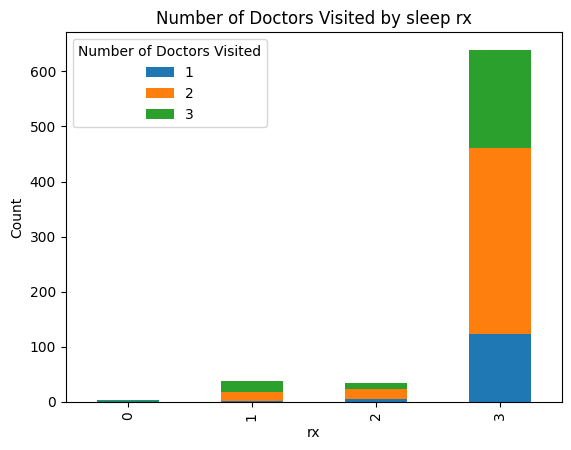

In [15]:
doctor_age_counts = df.groupby(['Prescription Sleep Medication', 'Number of Doctors Visited']).size().unstack()
doctor_age_counts.plot(kind='bar', stacked=True)
plt.xlabel('rx')
plt.ylabel('Count')
plt.title('Number of Doctors Visited by sleep rx')
plt.legend(title='Number of Doctors Visited')
plt.show()

In [16]:
#split data

X= df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


In [19]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_gb = r2_score(y_test, y_pred_gb)

cv_scores_gb = cross_val_score(gb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_gb = -cv_scores_gb.mean()

print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)
print("Mean Cross-Validated MSE:", mean_cv_mse_gb)


Mean Squared Error (MSE): 0.4643821896284424
R-squared (R2): -0.002973320206170138
Mean Cross-Validated MSE: 0.5193233438685416


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lasso )
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_lasso )
print("R-squared:", r2)
cv_scores = cross_val_score(lasso, X_scaled, y, cv=5)
print("Cross-validated performance:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
lasso_coef = lasso.coef_
print(lasso_coef)


Mean Squared Error (MSE): 0.42194546463345856
R-squared: 0.08868157939484622
Cross-validated performance: [0.04466314 0.04620068 0.04949881 0.00523287 0.00123918]
Mean CV Score: 0.029366934870306748
[ 0.          0.12122417 -0.00722096 -0.02374795  0.04585226  0.02556254
  0.10352807  0.          0.03361023  0.          0.         -0.09308728
 -0.02924914  0.        ]


lasso preforms slightly better than RF; but still both perform poorly

In [30]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_rf)
print("R-squared:", r2)
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores
print("Cross-validated MSE:", mse_cv)
print("Mean CV MSE:", mse_cv.mean())


Mean Squared Error (MSE): 0.48421882403835875
R-squared: -0.045816511698394624
Cross-validated MSE: [0.57283202 0.47991317 0.63343777 0.50340745 0.58259136]
Mean CV MSE: 0.5544363535074195


RF performs poorly even when I increased the number of decisions trees

In [26]:
#linear regression is not apprioriate for this dataset

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_true = y_test

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_true, y_pred)
print("R-squared (R2):", r2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_mse = -cv_results.mean()
print("Mean Cross-Validated MSE:", mean_mse)

cv_results = cross_val_score(reg, X, y, cv=kf)

print("Cross-validation results:", cv_results)

print("Mean:", np.mean(cv_results))
print("Standard Deviation:", np.std(cv_results))

print("95% Confidence Interval:", np.quantile(cv_results, [0.025, 0.975]))

residuals = y_test - y_pred

#linearity
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson test statistic:", dw_statistic)

#Homoscedasticity
_, lm_p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X_test)
print("Breusch-Pagan test p-value:", lm_p_value)


Mean Squared Error (MSE): 0.4194619722060737
R-squared (R2): 0.09404542990684395
Mean Cross-Validated MSE: 0.4549984090454835
Cross-validation results: [ 0.01874909  0.04033052 -0.05195005  0.05323798  0.04124532]
Mean: 0.020322573782054997
Standard Deviation: 0.03780822921743674
95% Confidence Interval: [-0.04488013  0.05203872]
Durbin-Watson test statistic: 2.1081123099027566
Breusch-Pagan test p-value: 0.956913016082009


In [32]:
#logistic regression is not an apprioriate model to answer the research question
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

y_true = y_test

mse = mean_squared_error(y_true, y_pred_log)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_true, y_pred_log)
print("R-squared (R2):", r2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mean_mse = -cv_results.mean()
print("Mean Cross-Validated MSE:", mean_mse)


Mean Squared Error (MSE): 0.46853146853146854
R-squared (R2): -0.011934938741022583
Mean Cross-Validated MSE: 0.4549984090454835


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
